In [3]:
import numpy as np
import pandas as pd
# Load the dataset
df = pd.read_csv(r'C:\Users\bhara\Desktop\biosense-ai_model\health_dataset_12000_bengali_full.csv', encoding='cp1252')

In [4]:
df.head()  # Display the first few rows of the dataframe

,name,gender,location,age,heart_rate,spo2,temperature,ecg,eeg,health_label
0,Subhajit Banerjee,Male,Kharagpur,56,94,99,98.8,2.08,1.14,0
1,Pradip Majumdar,Female,Asansol,69,101,97,98.9,0.76,1.05,1
2,Sourav Bhattacharya,Female,Bardhaman,46,133,93,96.7,1.73,0.23,2
3,Rahul Chatterjee,Female,Durgapur,32,129,93,97.3,1.36,0.90,2
4,Debasis Mondal,Male,Siliguri,60,78,87,99.9,1.22,0.91,2


In [5]:
df.info()  # Display information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          12000 non-null  object 
 1   gender        12000 non-null  object 
 2   location      12000 non-null  object 
 3   age           12000 non-null  int64  
 4   heart_rate    12000 non-null  int64  
 5   spo2          12000 non-null  int64  
 6   temperature   12000 non-null  float64
 7   ecg           12000 non-null  float64
 8   eeg           12000 non-null  float64
 9   health_label  12000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
df.isnull().sum()  # Check for missing values in the dataframe

name            0
gender          0
location        0
age             0
heart_rate      0
spo2            0
temperature     0
ecg             0
eeg             0
health_label    0
dtype: int64

In [7]:
df.dropna(inplace=True)  # Drop rows with missing values

In [8]:
df.drop("name", axis=1, inplace=True)  # Drop the 'name' column as it's not needed for modeling
df.drop("eeg" , axis=1, inplace=True)  # Drop the 'eeg' column as it's not needed for modeling

In [9]:
df.info()  # Display information about the dataframe after dropping columns
df.describe()  # Display statistical summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        12000 non-null  object 
 1   location      12000 non-null  object 
 2   age           12000 non-null  int64  
 3   heart_rate    12000 non-null  int64  
 4   spo2          12000 non-null  int64  
 5   temperature   12000 non-null  float64
 6   ecg           12000 non-null  float64
 7   health_label  12000 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


,age,heart_rate,spo2,temperature,ecg,health_label
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,48.700583,97.106667,91.998583,98.604525,1.499332,1.313083
std,17.879394,24.550455,4.320490,1.204591,0.400879,0.743937
min,18.000000,55.000000,85.000000,94.300000,-0.010000,0.000000
25%,33.000000,75.000000,88.000000,97.800000,1.230000,1.000000
50%,49.000000,97.000000,92.000000,98.600000,1.500000,1.000000
75%,64.000000,119.000000,96.000000,99.400000,1.770000,2.000000
max,79.000000,139.000000,99.000000,103.300000,2.930000,2.000000


In [10]:
df.shape  # Display the shape of the cleaned dataframe

(12000, 8)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Set the style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [13]:
# Map health labels to meaningful names
health_label_names = {0: 'Healthy', 1: 'At Risk', 2: 'Critical'}
df['health_status'] = df['health_label'].map(health_label_names)

# Create a figure with 3 subplots
fig = plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

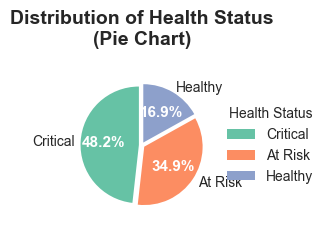

In [14]:
ax1 = plt.subplot(1, 3, 1)

# Count health status categories
health_counts = df['health_status'].value_counts()

# Create pie chart
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Green, Orange, Blue
wedges, texts, autotexts = ax1.pie(health_counts.values,
                                   labels=health_counts.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=[0.05, 0.05, 0.05])  # Slight explode for better visibility

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Add title
ax1.set_title('Distribution of Health Status\n(Pie Chart)', fontsize=14, fontweight='bold', pad=20)

# Add legend
ax1.legend(wedges, health_counts.index, title="Health Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

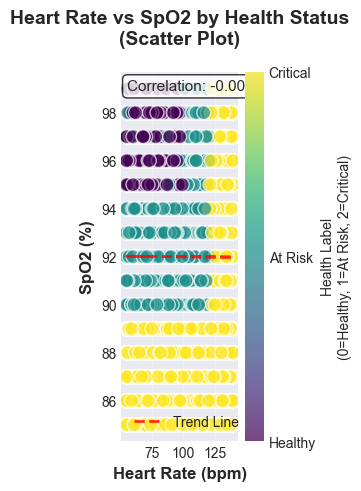

In [15]:
ax2 = plt.subplot(1, 3, 2)

# Create scatter plot with color coding by health status
scatter = ax2.scatter(df['heart_rate'], df['spo2'],
                      c=df['health_label'],
                      cmap='viridis',
                      s=100,  # Size of points
                      alpha=0.7,
                      edgecolors='w',
                      linewidth=1)

# Add regression line
z = np.polyfit(df['heart_rate'], df['spo2'], 1)
p = np.poly1d(z)
ax2.plot(df['heart_rate'], p(df['heart_rate']), "r--", alpha=0.8, linewidth=2, label='Trend Line')

# Set labels and title
ax2.set_xlabel('Heart Rate (bpm)', fontsize=12, fontweight='bold')
ax2.set_ylabel('SpO2 (%)', fontsize=12, fontweight='bold')
ax2.set_title('Heart Rate vs SpO2 by Health Status\n(Scatter Plot)', fontsize=14, fontweight='bold', pad=20)

# Add grid
ax2.grid(True, alpha=0.3)

# Add legend for health status
cbar = plt.colorbar(scatter, ax=ax2, ticks=[0, 1, 2])
cbar.set_label('Health Label\n(0=Healthy, 1=At Risk, 2=Critical)', fontsize=10)
cbar.set_ticklabels(['Healthy', 'At Risk', 'Critical'])

# Add correlation coefficient
correlation = df['heart_rate'].corr(df['spo2'])
ax2.text(0.05, 0.95, f'Correlation: {correlation:.2f}',
         transform=ax2.transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax2.legend()

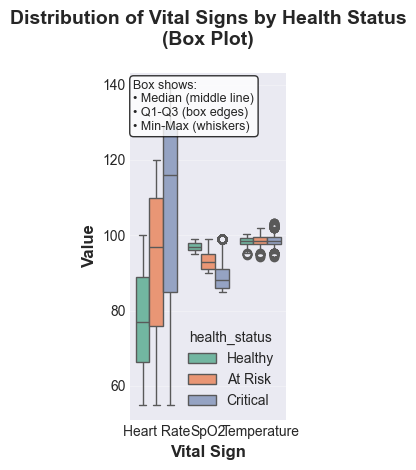

DATASET STATISTICS
Total records: 12000

Health Status Distribution:
health_status
Critical    5787
At Risk     4183
Healthy     2030
Name: count, dtype: int64

Average values by health status:
               heart_rate   spo2  temperature    age
health_status                                       
At Risk             92.76  93.30        98.66  48.58
Critical           107.11  89.31        98.61  48.52
Healthy             77.55  96.98        98.46  49.49

Correlation Matrix (Vital Signs):
             heart_rate  spo2  temperature   age
heart_rate         1.00 -0.00         -0.0  0.01
spo2              -0.00  1.00         -0.0  0.03
temperature       -0.00 -0.00          1.0 -0.00
age                0.01  0.03         -0.0  1.00


In [16]:
# 3. BOX PLOT - Vital Signs by Health Status
ax3 = plt.subplot(1, 3, 3)

# Prepare data for box plot
boxplot_data = []
titles = ['Heart Rate', 'SpO2', 'Temperature']
for i, (col, title) in enumerate(zip(['heart_rate', 'spo2', 'temperature'], titles)):
    # Create a temporary DataFrame for this vital sign
    temp_df = pd.DataFrame({
        'value': df[col],
        'health_status': df['health_status'],
        'vital_sign': title
    })
    boxplot_data.append(temp_df)

# Combine all data
boxplot_df = pd.concat(boxplot_data, ignore_index=True)

# Create box plot
sns.boxplot(x='vital_sign', y='value', hue='health_status', data=boxplot_df, ax=ax3, palette=colors)

# Set labels and title
ax3.set_xlabel('Vital Sign', fontsize=12, fontweight='bold')
ax3.set_ylabel('Value', fontsize=12, fontweight='bold')
ax3.set_title('Distribution of Vital Signs by Health Status\n(Box Plot)', fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.setp(ax3.get_xticklabels(), rotation=0)

# Add grid
ax3.grid(True, alpha=0.3, axis='y')

# Add statistics annotation
stats_text = "Box shows:\n• Median (middle line)\n• Q1-Q3 (box edges)\n• Min-Max (whiskers)"
ax3.text(0.02, 0.98, stats_text, transform=ax3.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Adjust layout
plt.tight_layout()

# Add overall title
fig.suptitle('Health Dataset Analysis Dashboard', fontsize=16, fontweight='bold', y=1.02)

# Show the plot
plt.show()

# Print some statistics
print("="*60)
print("DATASET STATISTICS")
print("="*60)
print(f"Total records: {len(df)}")
print("\nHealth Status Distribution:")
print(df['health_status'].value_counts())
print("\nAverage values by health status:")
stats_df = df.groupby('health_status').agg({
    'heart_rate': 'mean',
    'spo2': 'mean',
    'temperature': 'mean',
    'age': 'mean'
}).round(2)
print(stats_df)
print("\nCorrelation Matrix (Vital Signs):")
corr_matrix = df[['heart_rate', 'spo2', 'temperature', 'age']].corr()
print(corr_matrix.round(2))


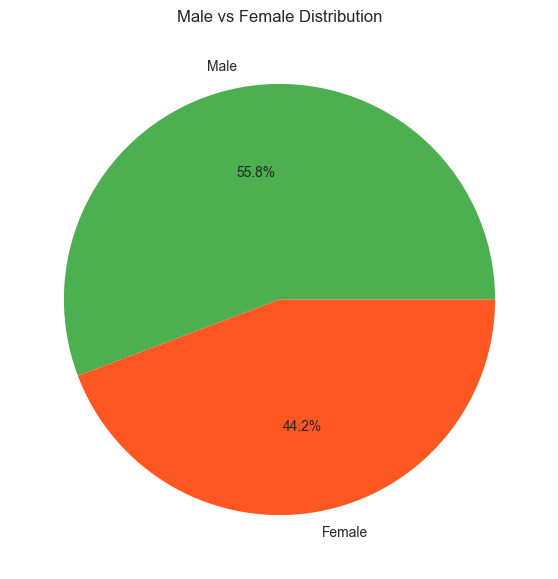

In [17]:
# Create a simple gender count (using sample from your data)
# In practice, load your full dataset
gender_counts = df['gender'].value_counts()
  # Example counts

# Or if you want to count from your actual data:
# gender_counts = df['gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['#4CAF50', '#FF5722'])

plt.title('Male vs Female Distribution')
plt.show()
plt.show(block=True)

In [18]:
# Features
X = df[["age", "heart_rate", "spo2", "temperature", "ecg"]]

# Target
le = LabelEncoder()
y = le.fit_transform(df["health_label"])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Prediction
y_pred = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       850
           2       1.00      1.00      1.00      1136

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



In [19]:
df.rename(columns={"health status & improvement": "health_status"}, inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["health_label"])


In [20]:
# Scale numeric features (X is already defined in the notebook)
from sklearn.preprocessing import StandardScaler

# Ensure X exists (in case cells were run out of order)
if 'X' not in globals():
    X = df[["age", "heart_rate", "spo2", "temperature", "ecg", "eeg"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split using the scaled features
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       850
           2       1.00      1.00      1.00      1136

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400


Logistic Regression Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       414
           1       0.67      0.66      0.67       850
           2       0.82      0.82      0.82      1136

    accuracy                           0.76      2400
   macro avg       0.77      0.76      0.77      2400
weighted avg       0.76      0.76      0.76      2400


Support Vector Machine Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       414
           1       0.96 

In [21]:
results = []
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
print("\nClassifier Performance Comparison:")
for name, acc in results:
    print(f"{name}: {acc:.2f}")    


Classifier Performance Comparison:
Random Forest: 1.00
Logistic Regression: 0.76
Support Vector Machine: 0.97
Naive Bayes: 0.86
Decision Tree: 1.00
K-Nearest Neighbors: 0.93


In [28]:
import pickle
# Save the model and scaler
with open(r'C:\Users\bhara\Desktop\biosense-ai_model\model\health_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open(r'C:\Users\bhara\Desktop\biosense-ai_model\model\scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print('Saved model to health_model.pkl and scaler to scaler.pkl')

Saved model to health_model.pkl and scaler to scaler.pkl


In [86]:
print("Model saved as health_model.pkl")

Model saved as health_model.pkl


In [29]:
# Use the scaled numpy x_test (features used during training) — not the DataFrame X_test that contains 'smoker'
print("Predictions for first 5 test samples:", rf.predict(x_test[:5]))

# Predict for a single test sample (index 10) — x_test is a 2D array with the same features used for training
sample = x_test[10].reshape(1, -1)  # shape (1, 6)
print("Prediction for sample index 10:", rf.predict(sample)[0])

# Actual label from y_test (numpy array)
print("Actual class for sample index 10:", y_test[10])

Predictions for first 5 test samples: [2 2 2 2 2]
Prediction for sample index 10: 2
Actual class for sample index 10: 2


C:\Users\bhara\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  The input samples.
C:\Users\bhara\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  The input samples.


In [30]:
import pickle
# Load the model and scaler
with open('health_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
print('Model and scaler loaded')
# Example prediction using loaded objects (x_test is already scaled)
sample = x_test[0].reshape(1, -1)  # shape (1, n_features)
pred = loaded_model.predict(sample)[0]
print('Prediction for first test sample:', pred)
print('Actual for first test sample:', y_test[0])

Model and scaler loaded
Prediction for first test sample: 2
Actual for first test sample: 2


C:\Users\bhara\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  The input samples.


In [ ]:
# def predict_using_loaded_model(age, heart_rate, spo2, temperature, ecg, eeg):
#     # Create a DataFrame for the input
#     input_df = pd.DataFrame([[age, heart_rate, spo2, temperature, ecg, eeg]],
#                             columns=["age", "heart_rate", "spo2", "temperature", "ecg", "eeg"])
    
#     # Scale the input using the loaded scaler
#     input_scaled = loaded_scaler.transform(input_df)
    
#     # Predict using the loaded model
#     prediction = loaded_model.predict(input_scaled)[0]
#     if prediction == 0:
#         return "Vitals are within the normal range. No immediate health risks detected. Maintain a healthy lifestyle and regular monitoring."    
#     elif prediction == 1:
#         return "Some vital signs are slightly abnormal. Monitoring and preventive care are advised to avoid potential health issues."
#     elif prediction == 2:
#         return "Vital signs indicate a critical condition. Immediate medical attention is strongly recommended."
    
#     return prediction
# # Example usage
# predicted_class = predict_using_loaded_model(45, 80, 98, 36.5, 0.5, 0.3)
# print("Predicted class for input sample:", predicted_class)


Predicted class for input sample: Vital signs indicate a critical condition. Immediate medical attention is strongly recommended.


C:\Users\bhara\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  The input samples.


In [32]:
def predict_using_loaded_model(age, heart_rate, spo2, temperature, ecg, eeg):
    # Create DataFrame
    input_df = pd.DataFrame(
        [[age, heart_rate, spo2, temperature, ecg, eeg]],
        columns=["age", "heart_rate", "spo2", "temperature", "ecg", "eeg"]
    )

    # Scale input
    input_scaled = loaded_scaler.transform(input_df)

    # Predict
    prediction = loaded_model.predict(input_scaled)[0]

    # Bigger & more informative prediction
    if prediction == 0:
        return {
            "Health Status": "NORMAL",
            "Risk Level": "Low",
            "Analysis": (
                "All vital signs are within clinically acceptable ranges. "
                "Heart rate, oxygen saturation, body temperature, ECG, and EEG "
                "signals indicate a stable physiological condition."
            ),
            "Recommendation": (
                "Maintain a healthy lifestyle, balanced diet, regular exercise, "
                "and periodic health monitoring."
            )
        }

    elif prediction == 1:
        return {
            "Health Status": "WARNING",
            "Risk Level": "Moderate",
            "Analysis": (
                "Some vital parameters show slight deviation from normal values. "
                "This may indicate early stress, fatigue, mild cardiovascular, "
                "respiratory, or neurological irregularities."
            ),
            "Recommendation": (
                "Regular monitoring is advised. Reduce stress, ensure adequate rest, "
                "stay hydrated, and consult a healthcare professional if symptoms persist."
            )
        }

    elif prediction == 2:
        return {
            "Health Status": "CRITICAL",
            "Risk Level": "High",
            "Analysis": (
                "Vital signs indicate a potentially serious medical condition. "
                "Abnormal heart rate, SpO₂, temperature, ECG, or EEG patterns suggest "
                "high physiological risk requiring urgent attention."
            ),
            "Recommendation": (
                "Immediate medical consultation or emergency care is strongly recommended. "
                "Continuous monitoring and clinical evaluation are necessary."
            )
        }
    return {"Error": "Invalid prediction value"}

In [34]:
# Example usage
predicted_class2 = predict_using_loaded_model(45, 80, 98, 36.5, 0.5, 0.3)
print("Predicted class for input sample:", predicted_class2)

Predicted class for input sample: {'Health Status': 'CRITICAL', 'Risk Level': 'High', 'Analysis': 'Vital signs indicate a potentially serious medical condition. Abnormal heart rate, SpO₂, temperature, ECG, or EEG patterns suggest high physiological risk requiring urgent attention.', 'Recommendation': 'Immediate medical consultation or emergency care is strongly recommended. Continuous monitoring and clinical evaluation are necessary.'}


C:\Users\bhara\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  The input samples.
